### Data visualisation

Let's start with importing necessary packages and custom mongo script.

In [26]:
import matplotlib.pyplot as plt
import mongo as mg

from pprint import pprint

I have already set up a local database in which I stored random entries. The format is following:
* Weight: range 40-200 kg
* Height: range 50-250 cm
* BMI: ratio between $\frac{weight}{height^2}$ where height is in meters
* Age: range 0-100 years
* Runner: category either 0 or 1
* Date: current date and time of insertion

These are also random categories I have come up with. 

Here are some examples of the entries:

In [32]:
for doc in mg.find({}, {'_id': 0}).limit(3):
    pprint(doc)

{'Age': 59,
 'BMI': 157.0247933884297,
 'Height': 110,
 'Runner': 0,
 'Weight': 190,
 'date': '2019-12-05 15:37:14.053059'}
{'Age': 85,
 'BMI': 57.8015143320714,
 'Height': 172,
 'Runner': 0,
 'Weight': 171,
 'date': '2019-12-05 15:37:33.425209'}
{'Age': 83,
 'BMI': 46.2962962962963,
 'Height': 144,
 'Runner': 0,
 'Weight': 96,
 'date': '2019-12-05 15:37:36.191413'}


Let's write a function to handle the output of MongoDB query. Since it's a dictionary containing the specified fields for each entry, we need to preprocess it in order to visualize it in further analysis.

In [42]:
def preprocess(queries):
    x = []
    for value in queries:
        x.append(*value.values())
    return x

Now let's find out what is the age distribution among the runners.

(array([3681.,  877.,  399.,  227.,  139.,   78.,   56.,   33.,   19.,
          15.]), array([  6.77408429,  83.69667586, 160.61926743, 237.541859  ,
        314.46445057, 391.38704214, 468.30963372, 545.23222529,
        622.15481686, 699.07740843, 776.        ]), <a list of 10 Patch objects>)

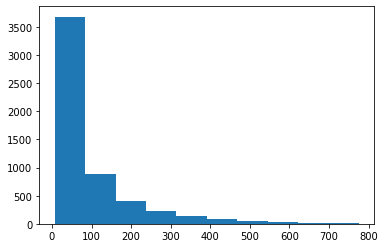

In [45]:
df = mg.find({'Runner': 1}, {'BMI': 1, '_id': 0})
processed = preprocess(df)
plt.hist(processed)